<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/19_3_Project_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A popular demonstration of the capability of deep learning techniques is object recognition in image data. The hello world of object recognition for machine learning and deep learning is the MNIST dataset for handwritten digit recognition. In this project you will discover how to develop a deep learning model to achieve near state-of-the-art performance on the MNIST handwritten digit recognition task in Python using the Keras deep learning library.

**19.1 Handwritten Digit Recognition Dataset**

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classiﬁcation problem. The dataset was constructed from a number of scanned document datasets available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modiﬁed NIST or MNIST dataset. 

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required. Each image is a 28 X 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it. 

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classiﬁcation accuracy. Excellent results achieve a prediction error of less than 1%. State-of-the-art prediction error of approximately 0.2% can be achieved with large Convolutional Neural Networks. There is a listing of the state-of-the-art results and links to the relevant papers on the MNIST and other datasets on Rodrigo Benenson’s webpage

# 19.2 Loading the MNIST dataset in Keras
The Keras deep learning library provides a convenience method for loading the MNIST dataset. The dataset is downloaded automatically the ﬁrst time this function is called and is stored in your home directory in ~/.keras/datasets/mnist.pkl.gz as a 15 megabyte ﬁle. This is very handy for developing and testing deep learning models. To demonstrate how easy it is to load the MNIST dataset, we will ﬁrst write a little script to download and visualize the ﬁrst 4 images in the training dataset.


In [1]:
# Plot ad hoc mnist instances 
from keras.datasets import mnist 
import matplotlib.pyplot as plt 
import numpy as np
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# load (downloaded if needed) the MNIST dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [3]:
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

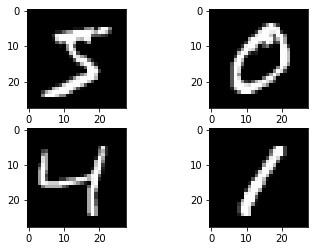

In [4]:
# plot 4 images as gray scale 
plt.subplot(221) 
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(222) 
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(223) 
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(224) 
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))
# show the plot 
plt.show() 

# 19.3 Baseline Model with Multilayer Perceptrons
Do we really need a complex model like a convolutional neural network to get the best results with MNIST? You can get good results using a very simple neural network model with a single hidden layer. In this section we will create a simple Multilayer Perceptron model that achieves an error rate of 1.74%. We will use this as a baseline for comparison to more complex convolutional neural network models.

In [5]:
# fix random seed for reproducibility 
seed = 7 
np.random.seed(seed)

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a Multilayer Perceptron model we must reduce the images down into a vector of pixels. In this case the 28 X 28 sized images will be 784 pixel input vectors. We can do this transform easily using the reshape( ) function on the NumPy array. The pixel values are integers, so we cast them to ﬂoating point values so that we can normalize them easily in the next step.


In [6]:
# flatten 28*28 images to a 784 vector for each image 
num_pixels = X_train.shape[1] * X_train.shape[2] 
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float32' )

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255

In [7]:
# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multiclass classiﬁcation problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix. We can easily do this using the built-in np utils.to categorical() helper function in Keras.


In [8]:
y_test[0]

7

In [9]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [10]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Creating the baseline model

We are now ready to create our simple neural network model. We will deﬁne our model in a function. This is handy if you want to extend the example later and try and get a better score.


In [12]:
num_pixels

784

In [11]:
# define baseline model 
def baseline_model(): 
  # create model 
  model = Sequential() 
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal' , activation= 'relu' )) 
  model.add(Dense(num_classes, kernel_initializer= 'normal' , activation= 'softmax' )) 
  # Compile model 
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
  return model

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectiﬁer activation function is used for the neurons in the hidden layer. A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called categorical crossentropy in Keras) and the ecient ADAM gradient descent algorithm is used to learn the weights. A summary of the network structure is provided below:

      Input Layer    -->    Hidden Layer    -->    Output Layer
       784(inputs)    X      784(neurons)    X       10(outputs)

We can now ﬁt and evaluate the model. The model is ﬁt over 10 epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to amplify the output to one line for each training epoch. Finally, the test dataset is used to evaluate the model and a classiﬁcation error rate is printed.


In [13]:
# build the model 
model = baseline_model() 
# Fit the model 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2782 - accuracy: 0.9210 - val_loss: 0.1412 - val_accuracy: 0.9576
Epoch 2/10
 - 5s - loss: 0.1114 - accuracy: 0.9677 - val_loss: 0.0922 - val_accuracy: 0.9716
Epoch 3/10
 - 5s - loss: 0.0718 - accuracy: 0.9797 - val_loss: 0.0788 - val_accuracy: 0.9765
Epoch 4/10
 - 5s - loss: 0.0505 - accuracy: 0.9857 - val_loss: 0.0751 - val_accuracy: 0.9772
Epoch 5/10
 - 5s - loss: 0.0372 - accuracy: 0.9893 - val_loss: 0.0668 - val_accuracy: 0.9793
Epoch 6/10
 - 5s - loss: 0.0271 - accuracy: 0.9927 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 7/10
 - 5s - loss: 0.0209 - accuracy: 0.9948 - val_loss: 0.0639 - val_accuracy: 0.9804
Epoch 8/10
 - 5s - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.0621 - val_accuracy: 0.9807
Epoch 9/10
 - 5s - loss: 0.0109 - accuracy: 0.9979 - val_loss: 0.0582 - val_accuracy: 0.9813
Epoch 10/10
 - 5s - loss: 0.0077 - accuracy: 0.9986 - val_loss: 0.0582 - val_accuracy: 0.9819


In [14]:
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.81%
